In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [66]:
df = pd.read_excel('data.xlsx')
df.head()

,ID,Data Criação,Status,Proprietário,Data Fechamento,Atividades Concluídas
0,5049,2017-07-01,Perdido,Daniela Klipp Mannelli,2017-07-24,0
1,10652,2017-12-15,Perdido,Gabriel Brandt,2017-12-16,0
2,70850,2019-10-31,Ganho,Vinicius Furlan,2019-10-31,0
3,70851,2019-10-31,Ganho,Vinicius Furlan,2019-10-31,0
4,34,2017-02-17,Perdido,Fernanda Sawczyn,2017-05-11,2


In [67]:
df.tail()

,ID,Data Criação,Status,Proprietário,Data Fechamento,Atividades Concluídas
41102,101836,2020-05-21,Em aberto,Anderson Azevedo,NaT,0
41103,101839,2020-05-21,Em aberto,Anderson Azevedo,NaT,0
41104,101842,2020-05-21,Em aberto,Hendrik Machado,NaT,0
41105,101844,2020-05-21,Em aberto,Maic Freitas,NaT,0
41106,101845,2020-05-21,Em aberto,Gustavo Camargo,NaT,0


In [68]:
df.shape

(41107, 6)

### 1 - Qual a conversão de vendas no mês de abr/2020?(Para a conversão considere os negócios com status "Ganho"/total de negócios)													


In [69]:
df['Data Fechamento'] = pd.to_datetime(df['Data Fechamento']) 
mask = (df['Data Fechamento'] >= '2020-4-1') & (df['Data Fechamento'] <= '2020-4-30')
subset=df.loc[mask]
subset=subset[subset['Status']=='Ganho'].groupby('Status').count().reset_index()
subset[['Status','ID']]

,Status,ID
0,Ganho,178


### 2 - Em qual mês de 2019 houve o maior número de negócios perdidos?													
													

In [70]:
mask = (df['Data Fechamento'] >= '2019-1-1') & (df['Data Fechamento'] <= '2020-12-31')
subset2=df.loc[mask]
subset2=subset2[subset2['Status']=='Perdido']
subset2=subset2.groupby(pd.Grouper(key='Data Fechamento',freq='M')).count().reset_index()
subset2=subset2.drop(columns=['Atividades Concluídas','Status','Data Criação','Proprietário']).sort_values(by='ID')
subset2.tail(1)
#subset2['Mês'] = subset2['Data Fechamento'].dt.month 
#subset2[['Mês','ID']]

,Data Fechamento,ID
3,2019-04-30,1903


### 3 - Crie um gráfico com o total de vendas(negócios com status "Ganho") mensal dos anos 2019 e 2020, com uma linha de tendência linear.													


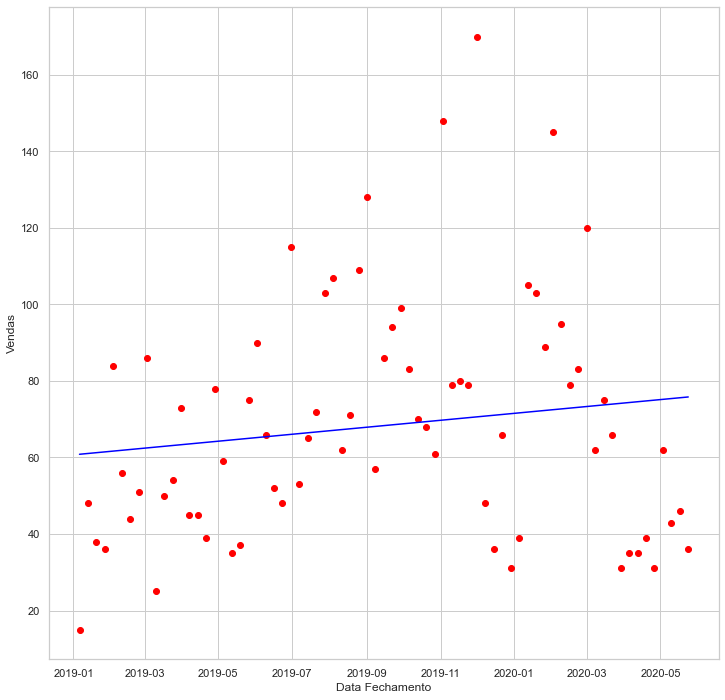

In [71]:
mask = (df['Data Fechamento'] >= '2019-1-1') & (df['Data Fechamento'] <= '2020-12-31')
subset3=df.loc[mask]
subset3=subset3[subset3['Status']=='Ganho']
subset3=subset3.groupby(pd.Grouper(key='Data Fechamento',freq='1w')).count().reset_index()
subset3.rename(columns = {'Status':'Vendas'}, inplace = True)

X=np.arange(1,len(subset3.index)+1)
X=X.reshape(len(X),1)
regressor=LinearRegression()
regressor.fit(X,subset3[['Vendas']])
y_pred = regressor.predict(X)

plt.figure(figsize=(12 ,12))
plt.scatter(subset3[['Data Fechamento']], subset3[['Vendas']], color = 'red')
plt.plot(subset3[['Data Fechamento']], y_pred, color = 'blue')
plt.xlabel('Data Fechamento')
plt.ylabel('Vendas')
plt.show()

### 4 - Em qual dia da semana ocorreu o maior número de vendas no mês de fev/2020?													


In [72]:
mask = (df['Data Fechamento'] >= '2020-2-1') & (df['Data Fechamento'] <= '2020-2-28')
subset4=df.loc[mask]
subset4=subset4[subset4['Status']=='Ganho']
subset4=subset4.groupby(pd.Grouper(key='Data Fechamento',freq='1d')).count().reset_index()
subset4=subset4[['Data Fechamento','ID']].nlargest(1,['ID'])
subset4

,Data Fechamento,ID
27,2020-02-28,66


In [73]:
subset4['Data Fechamento']=subset4['Data Fechamento'].dt.day_name()
subset4

,Data Fechamento,ID
27,Friday,66


### 5 - Qual o tempo médio em dias do fechamento dos negócios em jan/2020?													

In [74]:
mask = (df['Data Fechamento'] >= '2020-1-1') & (df['Data Fechamento'] <= '2020-1-31') & ((df['Status'] == 'Ganho') | (df['Status'] == 'Perdido'))
subset5=df.loc[mask].sort_values(by='Data Fechamento').reset_index()
totalFechamentos=len(subset5.index)
nroDias=len(subset5['Data Fechamento'].unique())
mediaFechamento=nroDias/totalFechamentos
mediaFechamento
#sumnegocios=subset5['Status'].str.contains(['Ganho', 'Perdido'])


0.0502092050209205

In [75]:
nroDias

24

In [76]:
totalFechamentos

478

In [77]:
subset5=subset5.groupby('Data Fechamento').count().reset_index()
subset5['cum_sum'] = subset5['ID'].cumsum()

<AxesSubplot:xlabel='Data Fechamento'>

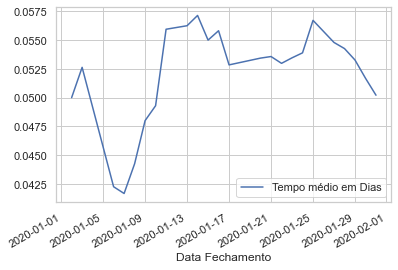

In [78]:
## Moving Average
subset5['count'] = np.arange(1,nroDias+1)
subset5['Tempo médio em Dias']=subset5['count']/subset5['cum_sum']
subset5[['Data Fechamento','Tempo médio em Dias']].plot(x='Data Fechamento',y='Tempo médio em Dias')

### 6 - Qual proprietário possui a maior média de atividades concluídas em 2019?(Considere proprietários com mais de 40 negócios)													


In [79]:
mask = (df['Data Fechamento'] >= '2019-1-1') & (df['Data Fechamento'] <= '2019-12-31') 
subset6=df.loc[mask]
subset6['Status']=np.ones(len(subset6.index))
subset6=subset6.groupby('Proprietário').sum().reset_index().drop(columns='ID')
subset6=subset6[subset6['Status']>40]
subset6['Media']=subset6['Atividades Concluídas']/subset6['Status']
subset6.nlargest(n=3 ,columns = 'Media')


C:\Users\Lunarti\AppData\Local\Temp/ipykernel_6660/3575594529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset6['Status']=np.ones(len(subset6.index))


,Proprietário,Status,Atividades Concluídas,Media
20,Rafael Fontana,53.0,559,10.547170
16,Maic Freitas,60.0,511,8.516667
17,Michel Vidal,49.0,393,8.020408


### 7 - Crie uma análise estatística da base de dados no ano de 2020 com abertura por mês (Utilize médias, correlação, quartil e mais funções que julgar relevantes)										

In [80]:
mask = (df['Data Criação'] >= '2020-1-1') & (df['Data Criação'] <= '2020-12-31') & (df['Status'] == 'Em aberto')
subset7=df.loc[mask]
#subset7=subset7.drop(columns=['ID','Data Fechamento']).sort_values(by='Data Criação')
subset7.describe()

,ID,Atividades Concluídas
count,1503.000000,1503.000000
mean,97806.805722,4.328011
std,4232.590544,4.591088
min,82197.000000,0.000000
25%,94999.500000,1.000000
50%,99594.000000,3.000000
75%,100908.500000,6.000000
max,101845.000000,46.000000


C:\Users\Lunarti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status'>

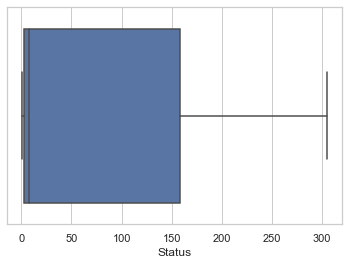

In [81]:
countbyProprietario=subset7.groupby('Proprietário').count().reset_index()
sns.boxplot(countbyProprietario['Status'])

<AxesSubplot:xlabel='Status', ylabel='Count'>

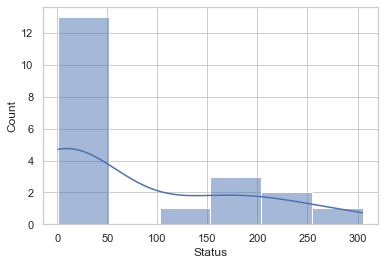

In [82]:
sns.histplot(countbyProprietario['Status'], kde=True)

In [83]:
countbyProprietario.describe()

,ID,Data Criação,Status,Data Fechamento,Atividades Concluídas
count,20.000000,20.000000,20.000000,20.0,20.000000
mean,75.150000,75.150000,75.150000,0.0,75.150000
std,100.075379,100.075379,100.075379,0.0,100.075379
min,1.000000,1.000000,1.000000,0.0,1.000000
25%,2.750000,2.750000,2.750000,0.0,2.750000
50%,7.500000,7.500000,7.500000,0.0,7.500000
75%,158.750000,158.750000,158.750000,0.0,158.750000
max,305.000000,305.000000,305.000000,0.0,305.000000


C:\Users\Lunarti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Atividades Concluídas'>

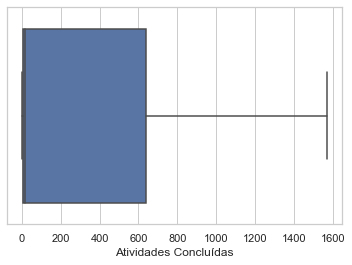

In [84]:
sumbyProprietario=subset7.groupby('Proprietário').sum().reset_index()
sns.boxplot(sumbyProprietario['Atividades Concluídas'])

<AxesSubplot:xlabel='Atividades Concluídas', ylabel='Count'>

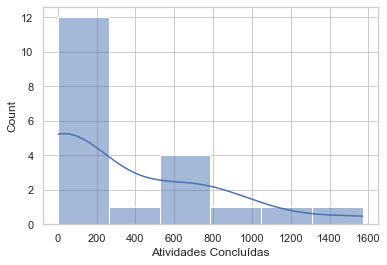

In [85]:
sns.histplot(sumbyProprietario['Atividades Concluídas'], kde=True)

<AxesSubplot:xlabel='Atividades Concluídas', ylabel='Proprietário'>

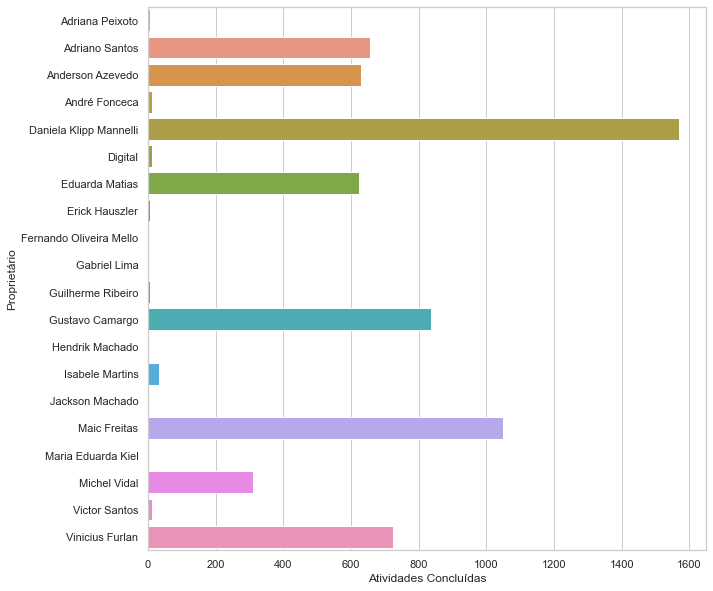

In [86]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
sns.barplot(x=sumbyProprietario['Atividades Concluídas'],y=sumbyProprietario['Proprietário'])

C:\Users\Lunarti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Atividades Concluídas'>

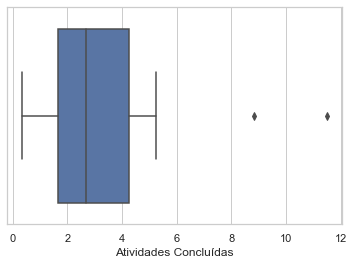

In [87]:
meanbyProprietario=subset7.groupby('Proprietário').mean().reset_index()
sns.boxplot(meanbyProprietario['Atividades Concluídas'])

<AxesSubplot:xlabel='Atividades Concluídas', ylabel='Count'>

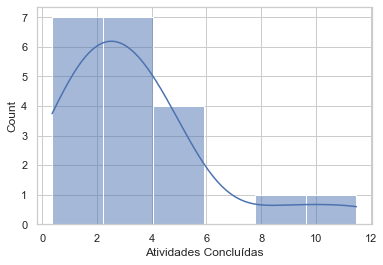

In [88]:
sns.histplot(meanbyProprietario['Atividades Concluídas'], kde=True)

<AxesSubplot:xlabel='Atividades Concluídas', ylabel='Proprietário'>

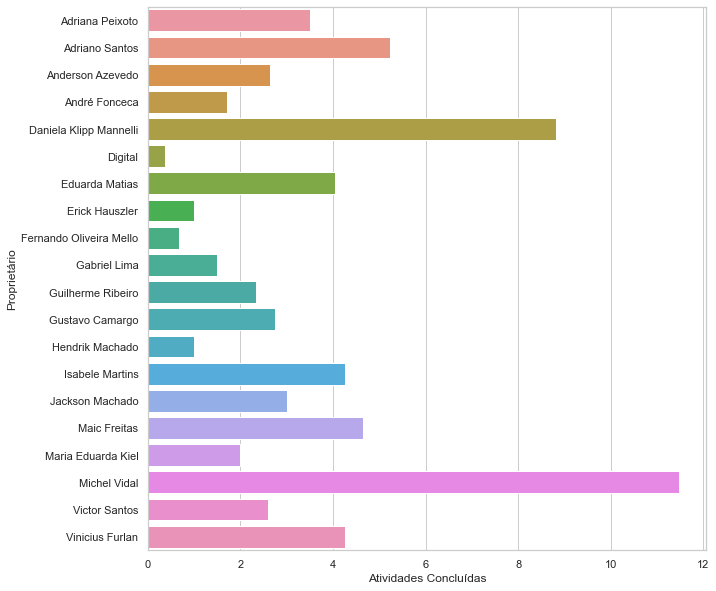

In [89]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=meanbyProprietario['Atividades Concluídas'],y=meanbyProprietario['Proprietário'])

In [90]:
CountMeanCorr=pd.DataFrame()
CountMeanCorr['Count']=countbyProprietario['Status']
CountMeanCorr['Mean']=meanbyProprietario['Atividades Concluídas']
CountMeanCorr.corr()

,Count,Mean
Count,1.000000,0.272328
Mean,0.272328,1.000000


<AxesSubplot:>

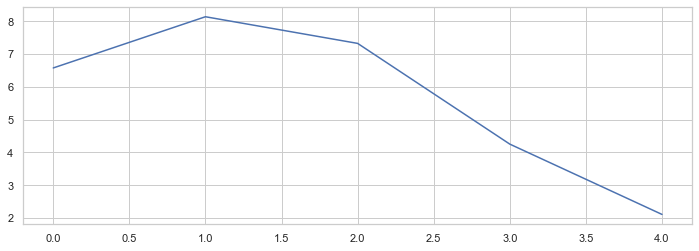

In [91]:
# Média de Atividades Concluídas por Mês
MeanByMonth=subset7.groupby(pd.Grouper(key='Data Criação',freq='1m')).mean().reset_index()
plt.figure(figsize=(12,4))
MeanByMonth['Atividades Concluídas'].plot.line()


<AxesSubplot:>

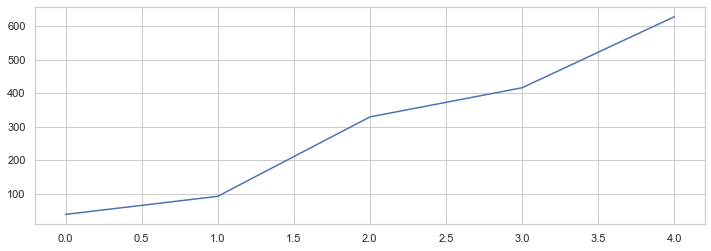

In [92]:
# Total de negócios abertos por Mês
CountByMonth=subset7.groupby(pd.Grouper(key='Data Criação',freq='1M')).count().reset_index()
plt.figure(figsize=(12,4))
CountByMonth['Status'].plot.line()

In [93]:
# Correlação entre média de atividades concluídas por mês e total de negócios abertos por mês
CountMeanCorr=pd.DataFrame()
CountMeanCorr['Count']=CountByMonth['Status']
CountMeanCorr['Mean']=MeanByMonth['Atividades Concluídas']
CountMeanCorr.corr()

,Count,Mean
Count,1.000000,-0.853162
Mean,-0.853162,1.000000


### 8 - Analisando o evolutivo mensal dos negócios do período entre jan/19 e jul/19, qual o índice de correlação apresentado entre o total de negócios e o total de negócios perdidos? A partir desse índice é possível afirmar que há uma relação entre esses dois indicadores? Justifique.		

In [94]:
mask = (df['Data Fechamento'] >= '2019-1-1') & (df['Data Fechamento'] <= '2019-07-31')
subset8=df.loc[mask]

<AxesSubplot:xlabel='Data Fechamento'>

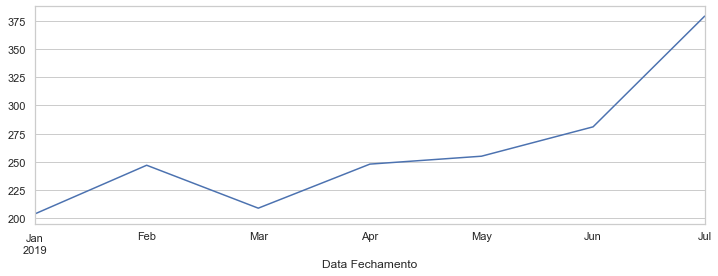

In [95]:
mask2 = (subset8['Status'] == 'Ganho')
ganhos=subset8.loc[mask2].groupby(pd.Grouper(key='Data Fechamento',freq='1M')).count()
plt.figure(figsize=(12,4))
ganhos['Status'].plot.line()

<AxesSubplot:xlabel='Data Fechamento'>

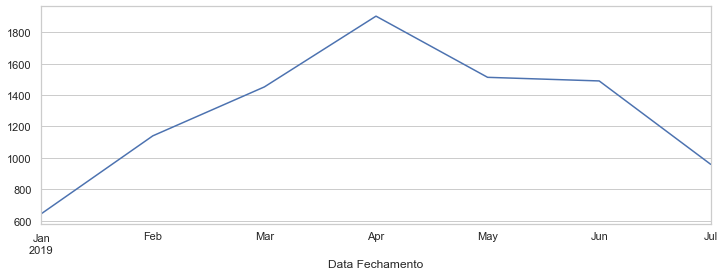

In [96]:
mask3 = (subset8['Status'] == 'Perdido')
perdidos=subset8.loc[mask3].groupby(pd.Grouper(key='Data Fechamento',freq='1M')).count()
plt.figure(figsize=(12,4))
perdidos['Status'].plot.line()

In [97]:
ganhoseperdidos=pd.DataFrame()
ganhoseperdidos['Perdidos']=perdidos['Status']
ganhoseperdidos['Ganhos']=ganhos['Status']
ganhoseperdidos.corr()

,Perdidos,Ganhos
Perdidos,1.000000,-0.094604
Ganhos,-0.094604,1.000000


### 9 - Analisando os dados históricos, crie uma projeção do total vendas para o mês de mai/2020. Explique como o cálculo foi realizado e quais parâmetros foram levados em consideração para a criação da projeção.													
													


<AxesSubplot:xlabel='Data Fechamento'>

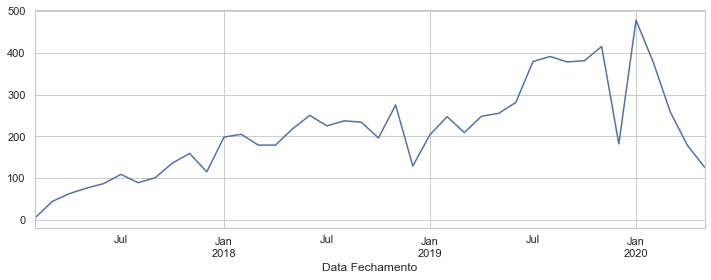

In [98]:
mask2 = (df['Status'] == 'Ganho')
ganhosCount=df.loc[mask2].groupby(pd.Grouper(key='Data Fechamento',freq='1M')).count()
plt.figure(figsize=(12,4))
ganhosCount['Status'].plot.line()

In [99]:
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA

In [100]:
model = pm.auto_arima(ganhosCount['Status'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=484.654, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=464.359, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=482.666, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=451.657, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=446.698, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=445.871, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=447.234, Time=0.21 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=443.903, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=442.060, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=440.063, Time=0.10 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=442.059, Time=0.19 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 se

C:\Users\Lunarti\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


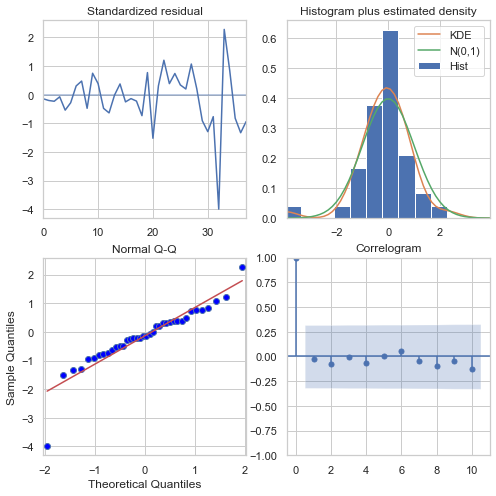

In [101]:
model.plot_diagnostics(figsize=(8,8))
plt.show()

In [102]:
# Forecast
n_periods = 6
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(ganhosCount['Status']), len(ganhosCount['Status'])+n_periods)

# Series for plot
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

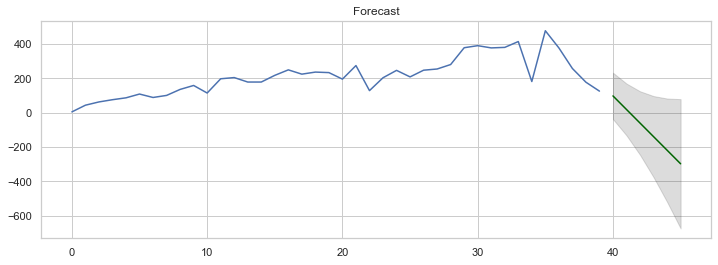

In [105]:
# Plot
plt.figure(figsize=(12,4))
plt.plot(ganhosCount['Status'].values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast")

plt.show()